Alumno: Pedro Luis David,De la Cruz Valdiviezo

### Pregunta 1

1 Dados los siguientes fragmentos de código Ruby, determina el resultado. Si puedes, encuentra un compañero, discute y luego valida tus soluciones escribiendo el código en un intérprete. Debe alternar quién escribe y quién explica el resultado.

In [2]:
fruta1 = "cereza"
fruta2 = "platano"
puts fruta1.reverse
puts fruta2.reverse!
fruta1 + " " + fruta2

azerec
onatalp


"cereza onatalp"

notamos que cuando agregamos al final "!" se sobreescribe en la misma variable, mientras no hagamos eso, se va a mantener igual

In [4]:
class Cadena
  @@hola = "hola alli!"
  def hola; "mundo"; end
end
smoothie = Cadena.new
smoothie.hola

"mundo"

Solo los metodos de instancias pueden ser llamados por instancias. En este caso el metodo "hola" es un metodo de instancia, por ello debemos crear un objeto "smoothie" de manera que pueda llamar al metodo "hola"

In [8]:
class Fruta
  def method_missing(metodo)
    if metodo.to_s =~ /^sabe_a_(.+)\?$/ # aqui entra cuando el metodo no se encuentra en la clase, si coincide con la expresion regular se ejecuta
      "Sí, esa fruta sabe a #{$1}!"
    else
      super
    end
  end
end

naranja = Fruta.new
puts naranja.sabe_a_agrio? 
puts naranja.sabe_a_dulce?

Sí, esa fruta sabe a agrio!
Sí, esa fruta sabe a dulce!


El metodo "method_missing" es un metodo que se llama cuando no se encuentra el metodo en la clase dada. Dentro de el validamos con una expresion regular al metodo llamado, en este caso si el metodo empieza con sabe_a_(...) se va a imprimir: Sí, esa fruta sabe a (...). Si es que no encuentra el patron, se hace llamar al metodo original con super

### Problema 2

2 En la siguiente parte, intenta reescribir cada uno de los siguientes métodos en una línea (corta). Una persona debe ser el escritor, mientras la otra explica qué escribir. Intenta alternar roles entre los dos ejercicios.

In [9]:
def foo(arr)
  res = 0
  arr.each {|n| res += n}
  res
end
arr = [1,2,3]
foo(arr)

6

In [10]:
def bar(hsh)
  res = {}
  hsh.each {|k,v| res[k] = v if v>100}
  res
end
h = {1 => 100,2 => 103,3 => 105}
bar(h)

{2=>103, 3=>105}

### Problema 3

3 En esta parte, crea tus propios iteradores con la declaración yield que devuelvan los siguientes elementos. Nuevamente, alterna roles entre los dos ejercicios.

(i) Escriba una función fib(n) que produzca los primeros n números de Fibonacci en secuencia y devuelva nil

```
>> fib(4) { |x| puts x }
1
1
2
3
nil
```

In [13]:
def fib(n)
  a = 1
  b = 0
  (1..n).each do 
    c = a + b
    yield(c)
    a = b
    b = c
  end
end
fib(4) { |x| puts x }

1
1
2
3


1..4

(ii) Escribe la función Array#odds que produce los elementos indexados impares de un arreglo  en secuencia y devuelve nil.

```
>> [10, 30, 50, 70, 90].odds do |n|
..
puts n
.. end
30
70
nil
```

In [14]:
def odds(array)
  array.each_with_index {|v,i| yield(v) if i.odd?}
end
a = [10, 30, 50, 70, 90]
odds(a) {|n| puts n}

30
70


[10, 30, 50, 70, 90]

In [17]:
class Array
  def odds
    self.each_with_index do |elemento, indice|
      yield(elemento) if indice.odd?
    end
    yield(nil)
  end
end

[10, 30, 50, 70, 90].odds do |n|
  puts n
end

NoMethodError: undefined method `odds' for [10, 30, 50, 70, 90]:Array

Lo quise hacer en la clase Array pero no me funciono en el Jupyter, pero si me funcionaba en mi IDE

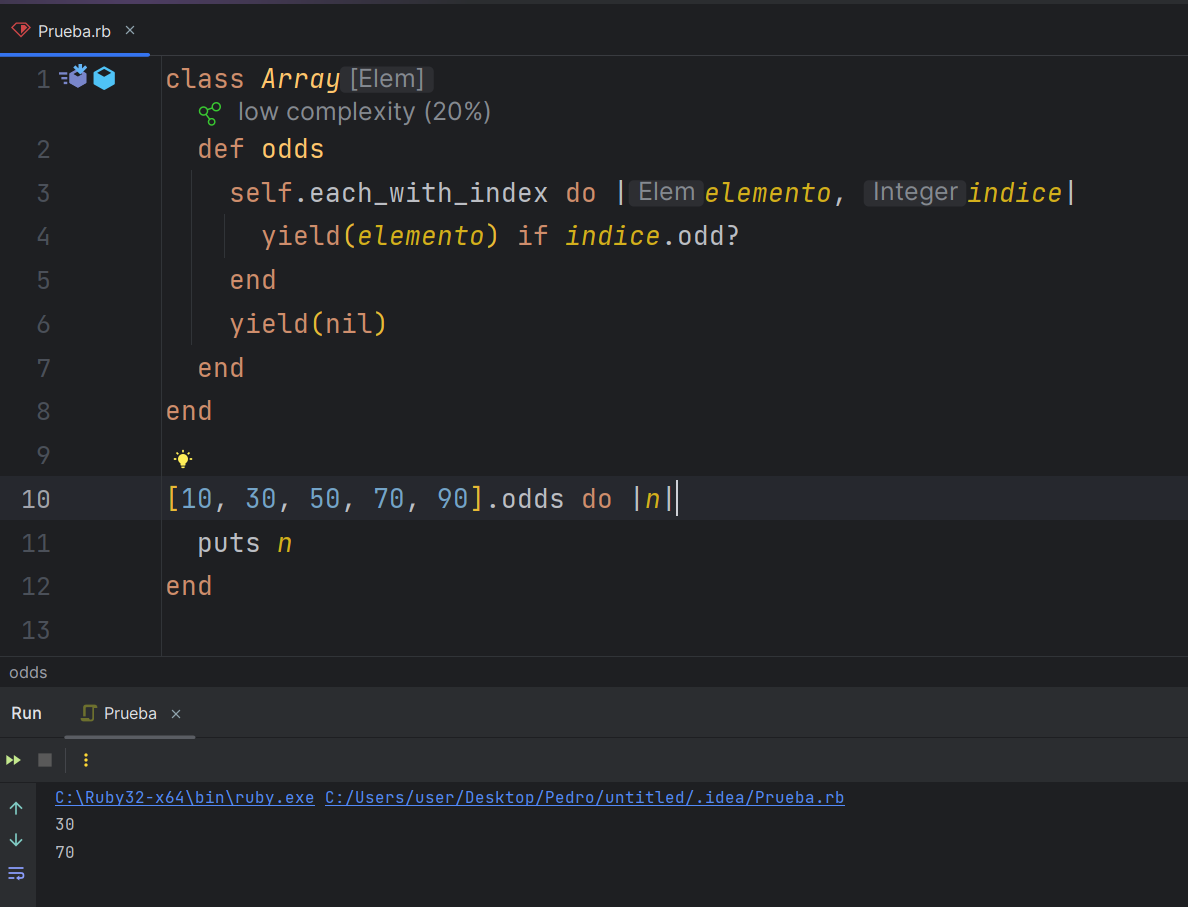